# Credit Card Fraud Detection
----

## About Dataset:

#### <ins>Context:</ins>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### <ins>Content:</ins> 

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

#### [Dataset Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


## The Index:
1. [The dependencies](#1)
2. [Explorirng the data](#2)


## <a name="1">Importing Dependencies</a>

In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import seaborn as sns

#from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn import metrics

## <a name="2">Exploring the data:</a>

In [8]:
#importing the data
df = pd.read_csv(r'archive/creditcard.csv')
#First 5 columns of our data
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#the dimensionality of our data
df.shape

(284807, 31)

In [28]:
#Count & percentage
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT : ', attrs = ['bold'],color='red'))
print(cl('--------------------------------------------', attrs = ['bold'],color='red'))
print('Total number of cases are :',end=" ")
print(cl('{}'.format(cases), attrs = ['bold'],color='green'))
print('Non-fraud cases are :',end=" ")
print(cl('{}'.format(nonfraud_count), attrs = ['bold'],color='green'))
print('Fraud cases are :',end=" ")
print(cl('{}'.format(fraud_count), attrs = ['bold'],color='green'))
print('Percentage of fraud cases is :',end=" ")

print(cl('{}%'.format(fraud_percentage), attrs = ['bold'],color='green'))
print(cl('--------------------------------------------', attrs = ['bold'],color='red'))


CASE COUNT : 
--------------------------------------------
Total number of cases are : 284807
Non-fraud cases are : 284315
Fraud cases are : 492
Percentage of fraud cases is : 0.17%
--------------------------------------------


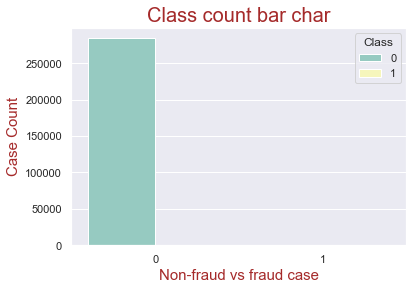

In [64]:
# A bar char representing the count of Non-fraud cases vs Fraud cases
plt.figure(figsize=(6,4))

sns.countplot(x="Class", hue="Class", data=df,palette="Set3")
plt.title("Class count bar char", fontsize=20,color="brown")
plt.xlabel("Non-fraud vs fraud case", fontsize=15,color="brown")
plt.ylabel("Case Count", fontsize=15,color="brown")

plt.show()

In [90]:
# 2. Description

nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold'],color="red"))
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))
print(cl('>>> NON-FRAUD CASE AMOUNT STATS <<<', attrs = ['bold']))
print((nonfraud_cases.Amount.describe()))
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))
print(cl('>>> FRAUD CASE AMOUNT STATS <<<', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))


CASE AMOUNT STATISTICS
--------------------------------------------
>>> NON-FRAUD CASE AMOUNT STATS <<<
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
>>> FRAUD CASE AMOUNT STATS <<<
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


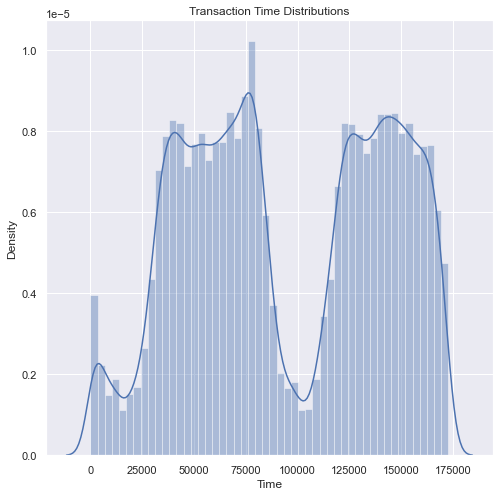

In [91]:
# 3. Distributions

# Transaction Time Distribution

plt.figure(figsize=(8,8))
plt.title('Transaction Time Distributions')
a=sns.distplot(df['Time'])
plt.show()

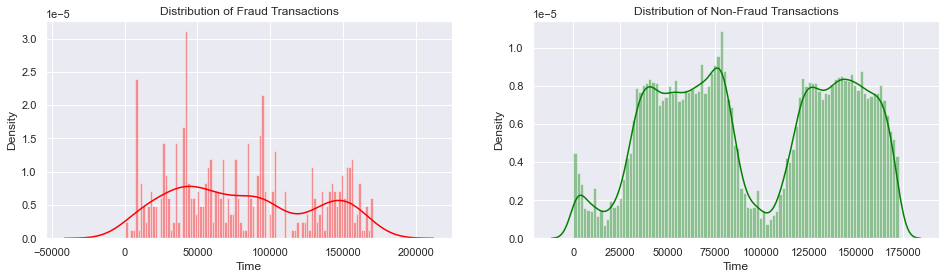

In [92]:
# Fraud Time Distribution

fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'],bins=100,color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100,color='green', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

In [93]:
#  training and predictions model to calculate the accuracy

#%% DATA SPLIT - SMOTE Dataset

from sklearn.model_selection import train_test_split # data split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import accuracy_score

X = df.drop(['Class','Amount'],axis=1) #removes Class,Amount.. we keep only the amount_scaled,time and v's 
y = df['Class'] # we will use y to compare it with the input


# to allocate 80% of the data for training and the remaining for testing
#X_train == training input, X_test == testing input, y_train == training output, y_test == testing output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True) 

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)
print('\n')
print('............')
print('\n')

smote= SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)




X_train:  (227845, 29)
y_train:  (227845,)
X_test:  (56962, 29)
y_test:  (56962,)


............


X_train_smote:  (454934, 29)
y_train_smote:  (454934,)
X_test_smote:  (56962, 29)
y_test_smote:  (56962,)


In [94]:
#%% METRICS
"""
For calculating the performance of each Classification model(with all the five 
datasets), it would be really beneficial to create a function which could 
evaluate all the metrics mentioned above and store them so that they could be
compared later.
"""
names=[]
aucs_tests = []   #AUC-ROC CURVE https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
accuracy_tests = []
precision_tests = []
recall_tests = []
f1_score_tests = []
mcc_score_tests = []
balanced_accuracy_tests = []
top_k_accuracy_tests = []
cohen_kappa_tests = []
def performance(model):
    for name, model, X_train, y_train, X_test, y_test in model:
        
        #appending name
        names.append(name)
        
        # Build model
        model.fit(X_train, y_train)
        
        #predictions
        y_test_pred = model.predict(X_test)
        
        # calculate accuracy
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_tests.append(Accuracy_test)
        
        # calculate auc
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_tests.append(Aucs_test)
        
        #precision_calculation
        Precision_score_test = metrics.precision_score(y_test , y_test_pred)
        precision_tests.append(Precision_score_test)
        
        # calculate recall
        Recall_score_test = metrics.recall_score(y_test , y_test_pred)
        recall_tests.append(Recall_score_test)
        
        #calculating F1
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_score_tests.append(F1Score_test)
        
        #calculating MCC
        MCC_score_tests = metrics.matthews_corrcoef(y_test, y_test_pred)
        mcc_score_tests.append(MCC_score_tests)
        
        #balanced_accuracy_score
        Balanced_Accuracy_test = metrics.balanced_accuracy_score(y_test,y_test_pred)
        balanced_accuracy_tests.append(Balanced_Accuracy_test)
        #top_k_accuracy
        
        Top_K_Accuracy_test = metrics.top_k_accuracy_score(y_test,y_test_pred)
        top_k_accuracy_tests.append(Top_K_Accuracy_test)

        #cohen_kappa_score
        Cohen_kappa_test = metrics.cohen_kappa_score(y_test,y_test_pred)
        cohen_kappa_tests.append(Cohen_kappa_test)
        
        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred) 
        
        print("Model Name :", name)
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        print('Test Precision : {0:0.5f}'.format(Precision_score_test))
        print('Test Recall : {0:0.5f}'.format(Recall_score_test))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        print("The Matthews correlation coefficient is{0:0.5f}".format(MCC_score_tests))
        print('Test Balanced Accuracy :{0:0.5f}'.format(Balanced_Accuracy_test))
        print('top_k_accuracy_score :{0:0.5f}'.format(Top_K_Accuracy_test))
        print('cohen_kappa_score :{0:0.5f}'.format(Cohen_kappa_test))
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")

        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()




In [ ]:
#%% MODELING - CLASSIFICATION ALGORITHMS
    
# 1. Logical Regression Classifier


LRmodel=[]

LRmodel.append(('LR IMBALANCED', LogisticRegression(solver='saga',multi_class='multinomial'),X_train, y_train, X_test, y_test))
LRmodel.append(('LR SMOTE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(LRmodel)

# 2. Random Forest Classifier

RFmodel = []

RFmodel.append(('RF IMABALANCED', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodel.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(RFmodel)


# 3. Gaussian Naïve Bayes Classifier

NBmodel = []

NBmodel.append(('NB IMBALANCED', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodel.append(('NB SMOTE', GaussianNB(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(NBmodel)

# 4. Decision Tree Classifier

DTmodel = []

DTmodel.append(('DT IMBALANCED', DecisionTreeClassifier(),X_train,y_train,X_test,y_test))
DTmodel.append(('DT SMOTE', DecisionTreeClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(DTmodel)

# 5. K-Nearest Neighbor Class

KNNmodel = []

KNNmodel.append(('KNN IMBALANCE', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodel.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(KNNmodel)

# 6. XG Boost Classifier

xgBOOST=[]
xgBOOST.append(('XGBOOST IMBALANCED', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train, y_train, X_test, y_test))
xgBOOST.append(('XGBOOST SMOTE', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(xgBOOST)

# 7. MLP Classifier

MLPclassifier=[]

MLPclassifier.append(('MLPClassifier IMBALANCE', MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train,y_train,X_test,y_test))
MLPclassifier.append(('MLPClassifier SMOTE',MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(MLPclassifier)

#8. SVM
from sklearn.svm import SVC

SVMclassifier=[]

SVMclassifier.append(('SVMclassifier IMBALANCE', SVC(kernel='sigmoid', random_state=42),X_train,y_train,X_test,y_test))
SVMclassifier.append(('SVMclassifier SMOTE',SVC(kernel='sigmoid', random_state=42),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(SVMclassifier)

In [ ]:
# COMPARE MCC SCORE FOR ALL DATASETS
comparison={
    'Model': names,
    'Accuracy': accuracy_tests,
    'AUC': aucs_tests,
    'Precision Score' : precision_tests,
    'Recall Score': recall_tests, 
    'F1 Score': f1_score_tests,
    'MCC Score': mcc_score_tests
}
print("Comparing performance of various Classifiers: \n \n")
comparison=pd.DataFrame(comparison)
comparison.sort_values('MCC Score',ascending=False)